---
Multi Layer Perceptron
---




**Soumabha Bhim**  
*June 29, 2024*


*A project submitted in fulfillment of the requirements for the summer internship at*  
*Ideas-Technology Innovation Hub, ISI Kolkata*

---


# <center> Buliding a Multi Layer Perceptron </center>

## Multi Layer Perceptron

<p style="text-align: justify;">The multilayer perceptron is a feedforward network (meaning that the data flows from the input layer to the output layer) defined by the presence of one or more hidden layers as well as an interconnection of all the neurons of one layer to the next. </p>

![Example of a MLP having two hidden layers](perceptron.png)
<p style="text-align: center;">Figure: Example of a MLP having two hidden layers</p>

The key components of the Multi-Layer Perceptron architecture are:
### Input Layer:
- The initial layer, known as the input layer, receives the raw data or features.
- Each node in this layer represents a specific feature, forming the input vector.
### Hidden Layers:
- Between the input and output layers, hidden layers process and transform the input data.
- Neurons within these layers apply weights and activation functions, allowing the network to capture intricate patterns and relationships.
### Output Layer:
- The final layer, the output layer, produces the model’s predictions or classifications.
The number of nodes in this layer depends on the nature of the task — one node for binary classification, multiple nodes for multi-class classification.
- Each of the nodes of the layers described can be understood as individual perceptrons and have the usual components as showed in the previous article (weights, biases and activation functions).

The training process consists of the following steps:

### Forward Propagation:
Also known as feedforward, in this step the input data is "fed" through the network, layer by layer, producing an output.

### Backward Propagation:
- The network’s output is compared to the actual target, and the error is calculated.
- This error is then propagated backward through the network using optimization algorithms like gradient descent.
- Weights and biases are adjusted iteratively to minimize the error, enhancing the model’s performance.

### Activation Functions
The idea is that a unit gets "activated" in more or less the same manner that a neuron gets activated when a sufficiently strong input is received. The selection of a sigmoid is arbitrary. Many different non-linear functions could be selected at this stage in the network, like a Tanh or a ReLU. Unfortunately, there is no principled way to chose activation functions for hidden layers. It is mostly a matter of trial and error.

<img src="https://miro.medium.com/max/1192/1*4ZEDRpFuCIpUjNgjDdT2Lg.png">

# Deep Neural Network

## Methodology

Model Architecture
The Multi-Layered Perceptron (MLP) used in this project has the following architecture:

- Input Layer: Number of features in the dataset.
- Hidden Layers: Configured based on layers_dims parameter, with relu activation functions.
- Output Layer: Configured based on the number of classes or regression targets.
Training Procedure
The training procedure involves the following steps:

- Initialization: Parameters (W weights and b biases) are initialized randomly using Xavier initialization for weights and zeros for biases.

Forward Propagation:

- Compute activations (A) using weighted sum of inputs (Z) followed by activation functions (relu or sigmoid for the output layer).
- Cache Z and A values for use in backward propagation.
Cost Computation: Compute the cost using:

- Cross-entropy loss for binary classification.
- Softmax cross-entropy loss for multiclass classification.
Backward Propagation:

- Compute gradients of weights (dW) and biases (db) using chain rule and activation derivatives (derivative_relu or - derivative_sigmoid).
- Update gradients using the learning rate.
- Parameter Updates: Update weights and biases using the computed gradients and learning rate.

Hyperparameters
- Learning Rate: Set to 0.03 for optimal convergence.
- Number of Iterations: Trained for 3000 iterations.
- Activation Function: Used relu for hidden layers and sigmoid for binary classification output or softmax for multiclass classification output.

Evaluation
- Accuracy: Calculated as the ratio of correctly predicted instances to total instances.
- Loss Curves: Plots showing the decrease of training loss over iterations. 

### Dataset Information
The dataset used in this project is dedicated to binary classification, specifically determining whether images or data points represent cats or not.

### Packages

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Loading and Preprocessing Data

In [2]:
X_train = np.loadtxt('dataset/cat_train_x.csv', delimiter = ',')/255.0
Y_train = np.loadtxt('dataset/cat_train_y.csv', delimiter = ',').reshape(1, X_train.shape[1])
X_test = np.loadtxt('dataset/cat_test_x.csv', delimiter = ',')/255.0
Y_test = np.loadtxt('dataset/cat_test_y.csv', delimiter = ',').reshape(1, X_test.shape[1])

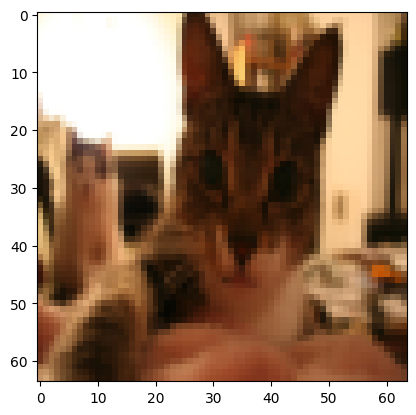

In [3]:
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(64,64, 3))
plt.show()

### Activation Functions

In [4]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

def softmax(z):
    expZ = np.exp(z)
    return expZ/(np.sum(expZ, 0))

def relu(Z):
    A = np.maximum(0,Z)
    return A

def tanh(x):
    return np.tanh(x)

def derivative_relu(Z):
    return np.array(Z > 0, dtype = 'float')

def derivative_tanh(x):
    return (1 - np.power(x, 2))

### Initialize Parameters

In [5]:
def initialize_parameters(layer_dims):
    
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

### Setting up Layer dimensions

In [6]:
layer_dims = [X_train.shape[0], 100, 200, Y_train.shape[0]]
params = initialize_parameters(layer_dims)

for l in range(1, len(layer_dims)):
    print("Shape of W" + str(l) + ":", params['W' + str(l)].shape)
    print("Shape of B" + str(l) + ":", params['b' + str(l)].shape, "\n")

Shape of W1: (100, 12288)
Shape of B1: (100, 1) 

Shape of W2: (200, 100)
Shape of B2: (200, 1) 

Shape of W3: (1, 200)
Shape of B3: (1, 1) 



### Forward Propagation


In [7]:
def forward_propagation(X, parameters, activation):
   
    forward_cache = {}
    L = len(parameters) // 2                  
    
    forward_cache['A0'] = X

    for l in range(1, L):
        forward_cache['Z' + str(l)] = parameters['W' + str(l)].dot(forward_cache['A' + str(l-1)]) + parameters['b' + str(l)]
        
        if activation == 'tanh':
            forward_cache['A' + str(l)] = tanh(forward_cache['Z' + str(l)])
        else:
            forward_cache['A' + str(l)] = relu(forward_cache['Z' + str(l)])
            

    forward_cache['Z' + str(L)] = parameters['W' + str(L)].dot(forward_cache['A' + str(L-1)]) + parameters['b' + str(L)]
    
    if forward_cache['Z' + str(L)].shape[0] == 1:
        forward_cache['A' + str(L)] = sigmoid(forward_cache['Z' + str(L)])
    else :
        forward_cache['A' + str(L)] = softmax(forward_cache['Z' + str(L)])
    
    return forward_cache['A' + str(L)], forward_cache

### Validating Activation Shapes

In [8]:
aL, forw_cache = forward_propagation(X_train, params, 'relu')

for l in range(len(params)//2 + 1):
    print("Shape of A" + str(l) + " :", forw_cache['A' + str(l)].shape)

Shape of A0 : (12288, 209)
Shape of A1 : (100, 209)
Shape of A2 : (200, 209)
Shape of A3 : (1, 209)


### Cost Function

#### For binary classification:
$ Cost = - \frac{1}{m} \sum_{i=1}^{m} [ y*log(a_L) + (1-y)*log(1 - a_L) ] $

#### For multi-class classification:

$ Cost = - \frac{1}{m} \sum_{i=1}^{m} \sum_{i=k}^{n}[ y_k*log(a_k) ]$

In [9]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    
    if Y.shape[0] == 1:
        cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    else:
        cost = -(1./m) * np.sum(Y * np.log(AL))
        
    cost = np.squeeze(cost)
    
    return cost

### Backward Propagation

In [10]:
def backward_propagation(AL, Y, parameters, forward_cache, activation):
    
    grads = {}
    L = len(parameters)//2
    m = AL.shape[1]
    
    grads["dZ" + str(L)] = AL - Y
    grads["dW" + str(L)] = 1./m * np.dot(grads["dZ" + str(L)],forward_cache['A' + str(L-1)].T)
    grads["db" + str(L)] = 1./m * np.sum(grads["dZ" + str(L)], axis = 1, keepdims = True)
    
    for l in reversed(range(1, L)):
        if activation == 'tanh':
            grads["dZ" + str(l)] = np.dot(parameters['W' + str(l+1)].T,grads["dZ" + str(l+1)])*derivative_tanh(forward_cache['A' + str(l)])
        else:
            grads["dZ" + str(l)] = np.dot(parameters['W' + str(l+1)].T,grads["dZ" + str(l+1)])*derivative_relu(forward_cache['A' + str(l)])
            
        grads["dW" + str(l)] = 1./m * np.dot(grads["dZ" + str(l)],forward_cache['A' + str(l-1)].T)
        grads["db" + str(l)] = 1./m * np.sum(grads["dZ" + str(l)], axis = 1, keepdims = True)

    return grads

### Validating Gradient Shapes

In [11]:
grads = backward_propagation(forw_cache["A" + str(3)], Y_train, params, forw_cache, 'relu')

for l in reversed(range(1, len(grads)//3 + 1)):
    print("Shape of dZ" + str(l) + " :", grads['dZ' + str(l)].shape)
    print("Shape of dW" + str(l) + " :", grads['dW' + str(l)].shape)
    print("Shape of dB" + str(l) + " :", grads['db' + str(l)].shape, "\n")

Shape of dZ3 : (1, 209)
Shape of dW3 : (1, 200)
Shape of dB3 : (1, 1) 

Shape of dZ2 : (200, 209)
Shape of dW2 : (200, 100)
Shape of dB2 : (200, 1) 

Shape of dZ1 : (100, 209)
Shape of dW1 : (100, 12288)
Shape of dB1 : (100, 1) 



### Updating Parameters

In [12]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

### Predictions

In [13]:
def predict(X, y, parameters, activation):

    m = X.shape[1]
    y_pred, caches = forward_propagation(X, parameters, activation)
    
    if y.shape[0] == 1:
        y_pred = np.array(y_pred > 0.5, dtype = 'float')
    else:
        y = np.argmax(y, 0)
        y_pred = np.argmax(y_pred, 0)
    
    return np.round(np.sum((y_pred == y)/m), 2)

### Complete Model

We need to initialize parameters once, and after that, we will run the following in a loop:
- forward_prop(x, parameters)
- cost_function(aL, y)
- backward_prop(x, y, parameters, forward_cache)
- parameters = update_parameters(parameters, gradients, learning_rate)

In [14]:
def model(X, Y, layers_dims, learning_rate = 0.03, activation = 'relu', num_iterations = 3000):#lr was 0.009

    np.random.seed(1)
    costs = []              
    
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        AL, forward_cache = forward_propagation(X, parameters, activation)

        cost = compute_cost(AL, Y)

        grads = backward_propagation(AL, Y, parameters, forward_cache, activation)

        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % (num_iterations/10) == 0:
            print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(i, np.round(cost, 2), predict(X_train, Y_train, parameters, activation), predict(X_test, Y_test, parameters, activation)))
        
        if i % 10 == 0:
            print("===", end = '')
            costs.append(cost)  # Append cost to the list
    # Plot the loss curve
    plt.plot(np.squeeze(costs))
    plt.xlabel('Iterations (per hundreds)')
    plt.ylabel('Cost')
    plt.title('Learning rate =' + str(learning_rate))
    plt.show()

    return parameters, costs

### Training the model


iter:0 	 cost: 0.77 	 train_acc:0.51 	 test_acc:0.42
iter:250 	 cost: 0.63 	 train_acc:0.74 	 test_acc:0.64
iter:500 	 cost: 0.54 	 train_acc:0.78 	 test_acc:0.7
iter:750 	 cost: 0.44 	 train_acc:0.92 	 test_acc:0.78
iter:1000 	 cost: 0.32 	 train_acc:0.96 	 test_acc:0.8
iter:1250 	 cost: 0.23 	 train_acc:0.98 	 test_acc:0.76
iter:1500 	 cost: 0.16 	 train_acc:0.98 	 test_acc:0.82
iter:1750 	 cost: 0.13 	 train_acc:0.98 	 test_acc:0.8
iter:2000 	 cost: 0.11 	 train_acc:0.98 	 test_acc:0.8
iter:2250 	 cost: 0.1 	 train_acc:0.98 	 test_acc:0.8

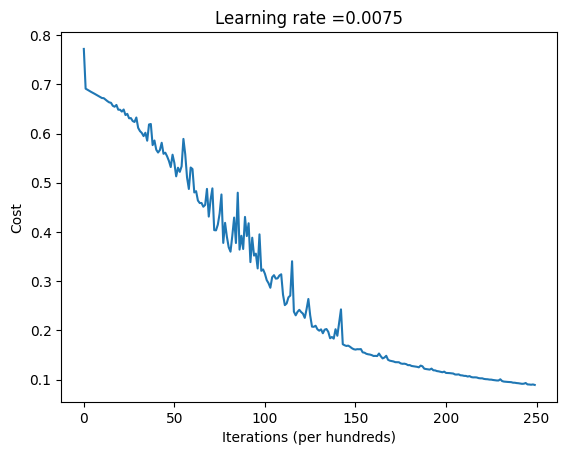

In [15]:
layers_dims = [X_train.shape[0], 20, 7, 5, Y_train.shape[0]] #  4-layer model
lr = 0.0075
iters = 2500

parameters = model(X_train, Y_train, layers_dims, learning_rate = lr, activation = relu, num_iterations = iters)

### Conclusion
In conclusion, this project implemented a Multi-Layered Perceptron (MLP) using Python and NumPy to classify images from a cat dataset. After training the model for 2250 iterations, the following results were achieved:

- Training Accuracy: 98%
- Test Accuracy: 80%

### References

- [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by François Chollet, Manning Publications, 2019.

- [Neural Networks and Deep Learning: A Textbook]( https://doi.org/10.1007/978-3-319-94463-0) by Charu C. Aggarwal, Springer, 2018.

- [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) Wikipedia.

<center>________________</center>
